In [2]:
print(" shree ganeshay namhh")

 shree ganeshay namhh


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

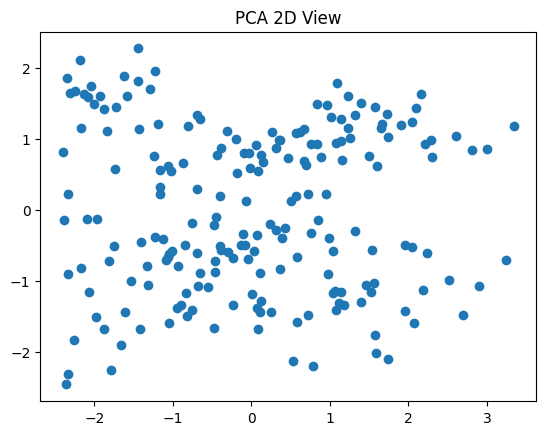

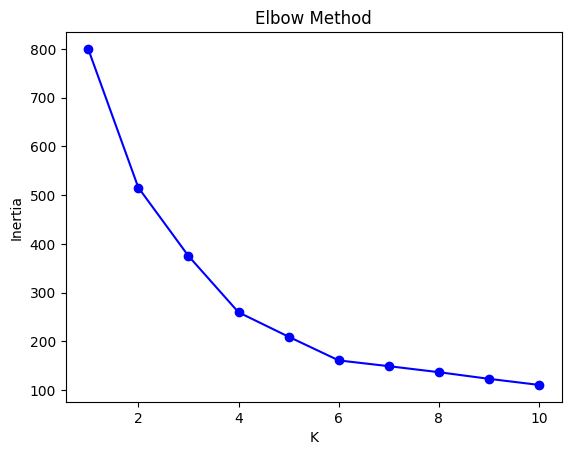

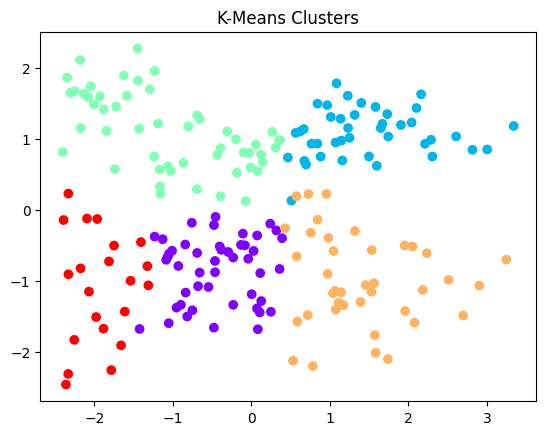

Silhouette Score: 0.4272395443393026


In [5]:
data=pd.read_csv("Mall_Customers (1).csv")
X=data.select_dtypes(include=['float64','int64'])
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.title("PCA 2D View")
plt.show()

inertia=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1,11),inertia,'bo-')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

kmeans=KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit_predict(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap='rainbow')
plt.title("K-Means Clusters")
plt.show()

score=silhouette_score(X_scaled,labels)
print("Silhouette Score:",score)

In [7]:
import numpy as np
centers=kmeans.cluster_centers_
print("Cluster Centers:\n",centers)
unique,counts=np.unique(labels,return_counts=True)
for u,c in zip(unique,counts):
    print("Cluster",u,":",c,"samples")

Cluster Centers:
 [[-0.30569236  1.17735545 -0.24795511 -0.04658587]
 [ 1.03142803 -0.43908961  0.95706585  1.1919166 ]
 [-0.78176424 -0.99120839 -0.74439195  0.48870372]
 [ 1.04745972  0.10645392  0.98962564 -1.20426472]
 [-1.33905697  0.47895722 -1.30822992 -1.19644353]]
Cluster 0 : 47 samples
Cluster 1 : 41 samples
Cluster 2 : 52 samples
Cluster 3 : 39 samples
Cluster 4 : 21 samples


In [9]:
data['Cluster']=labels
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        4  
3        2  
4        4  


In [10]:
cluster_summary=data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         82.851064  55.255319           54.063830               49.000000
1        160.048780  32.731707           85.634146               80.902439
2         55.365385  25.038462           41.057692               62.788462
3        160.974359  40.333333           86.487179               19.179487
4         23.190476  45.523810           26.285714               19.380952


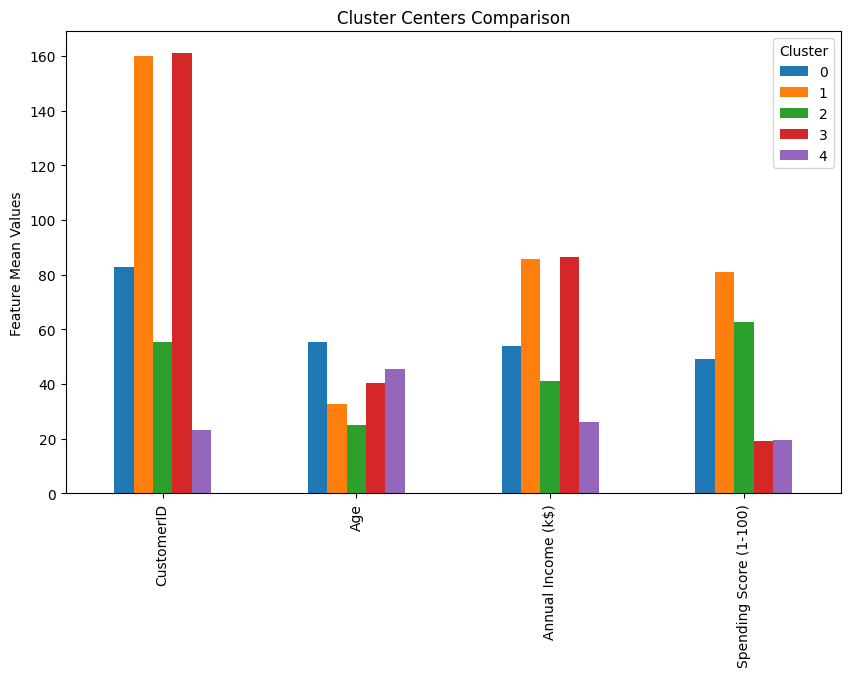

In [11]:
cluster_summary.T.plot(kind='bar', figsize=(10,6))
plt.title("Cluster Centers Comparison")
plt.ylabel("Feature Mean Values")
plt.show()

In [13]:
new_sample=pd.DataFrame([[40,60000,50,15]],columns=X.columns)
new_sample_scaled=scaler.transform(new_sample)
pred=kmeans.predict(new_sample_scaled)
print("Predicted Cluster for new sample:",pred[0])
data.to_csv("clustered_mall_customers.csv",index=False)
print("Clustered dataset saved as clustered_mall_customers.csv")


Predicted Cluster for new sample: 0
Clustered dataset saved as clustered_mall_customers.csv
